_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [3]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [4]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [6]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Table 2 --> Tidy

In [127]:
tidy2 = table2\
            .stack(dropna=False)\
            .reset_index()\
            .rename(columns={'level_0': 'Treatment Type', 'level_1': 'Name', 0: 'Result'})\
            .replace({'treatmenta': 'A', 'treatmentb': 'B'})

tidy2

,Treatment Type,Name,Result
0,A,John Smith,NaN
1,A,Jane Doe,16.0
2,A,Mary Johnson,3.0
3,B,John Smith,2.0
4,B,Jane Doe,11.0
5,B,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [139]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [149]:
# Reordered, but equivalent

tidy2\
    .pivot(index='Treatment Type', columns='Name', values='Result')

Name,Jane Doe,John Smith,Mary Johnson
Treatment Type,,,
A,16.0,NaN,3.0
B,11.0,2.0,1.0


In [150]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


## Seaborn uses tidy data



> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

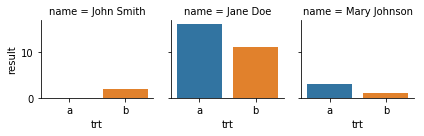

In [11]:
import seaborn as sns

sns.catplot(
    x='trt',
    y='result',
    col='name',
    kind='bar',
    height=2,
    data=tidy
)

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [9]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-01-16 09:40:22--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.129.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.129.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M   370KB/s    in 4m 33s  

2019-01-16 09:44:56 (735 KB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [15]:
!mkdir -p downloads
!tar --gunzip -xvf instacart_online_grocery_shopping_2017_05_01.tar.gz
!mv instacart_2017_05_01 downloads

Run these cells to load the data

In [205]:
%cd downloads/instacart_2017_05_01

/Users/work/.work/src/projects/lambdaschool/unit-1/DS-Unit-1-Sprint-2-Data-Wrangling/module3-reshape-data/downloads/instacart_2017_05_01


In [18]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [17]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [23]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [21]:
a = products[['product_id', 'product_name']]
b = order_products[['order_id', 'product_id']]
c = orders[['order_id', 'order_hour_of_day']]

ab = pd.merge(a, b)
abc = pd.merge(ab, c)

In [22]:
abc.shape

(33819106, 4)

In [24]:
abc.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [54]:
subset = abc[abc['product_name'].isin(product_names)]

## 4 ways to reshape and plot

### 1. value_counts

In [59]:
froyo = subset['product_name'] == product_names[0]
cream = subset['product_name'] == product_names[1]

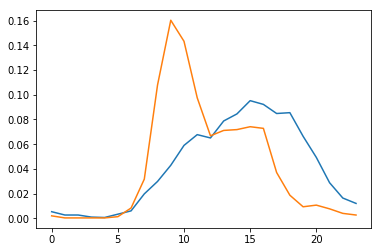

In [65]:
subset[froyo]['order_hour_of_day'].value_counts(normalize=True).sort_index().plot()
subset[cream]['order_hour_of_day'].value_counts(normalize=True).sort_index().plot()

### 2. crosstab

In [152]:
pd.crosstab(subset.order_hour_of_day, subset.product_name)

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,6,16
1,1,8
2,1,8
3,0,3
4,1,2
5,4,10
6,25,18
7,95,59
8,323,89


In [182]:
percent_sold_of_total_product_sold = pd.crosstab(subset.order_hour_of_day, subset.product_name, normalize='columns')
composition_of_products_sold_each_hour = pd.crosstab(subset.order_hour_of_day, subset.product_name, normalize='index')
percent_sold_of_all_products_sold = pd.crosstab(subset.order_hour_of_day, subset.product_name, normalize='all')

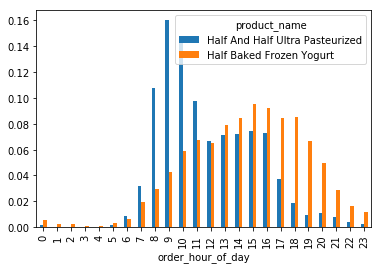

In [177]:
# Are those orders from the entire data set that were made for yogurt or half and half. This
# graph shows at each hour, the percentage of that product ordered as a function of all orders
# for that product in a day. So at hour 9, 16% of all half and half that would be ordered that
# day, was ordered in that hour.

percent_sold_of_total_product_sold.plot.bar()

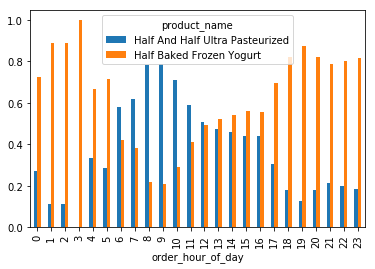

In [178]:
# This graph displays the composition of hourly orders for both yogurt and half and half. That is, at hour 12
# when considering only these two products, half and half was ordered only slightly more that hour than yogurt.

composition_of_products_sold_each_hour.plot.bar()

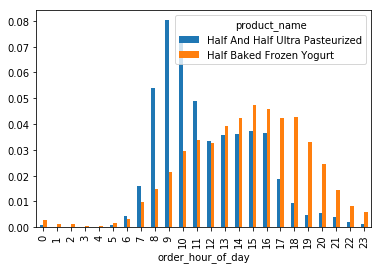

In [183]:
# This plot shows the percentage, at each hour in the day, of a product sold in that hour over _all_ products
# sold that day, so we see that at hour 9, half and half represents 8% of all yogurt and half and half sold that
# day.

percent_sold_of_all_products_sold.plot.bar()

### 3. pivot_table

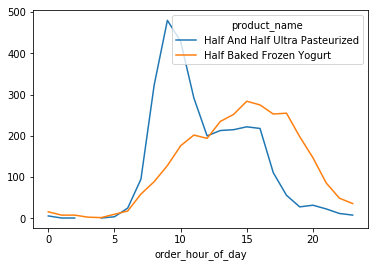

In [75]:
subset.pivot_table(
    index='order_hour_of_day',
    columns='product_name',
    values='order_id',
    aggfunc=len
).plot()

### 4. melt

In [89]:
table = pd.crosstab(subset.order_hour_of_day, subset.product_name, normalize='all')
melted = table\
    .reset_index()\
    .melt(id_vars='order_hour_of_day')\
    .rename(columns={
        'order_hour_of_day': 'Hour of Day Ordered',
        'product_name': 'Product',
        'value': 'Percent of Orders by Product'
    })

In [166]:
melted.head()

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,#2 Coffee Filters,8.870725e-08
1,1,#2 Coffee Filters,1.182763e-07
2,2,#2 Coffee Filters,1.182763e-07
3,3,#2 Coffee Filters,2.956908e-08
4,4,#2 Coffee Filters,0.000000e+00


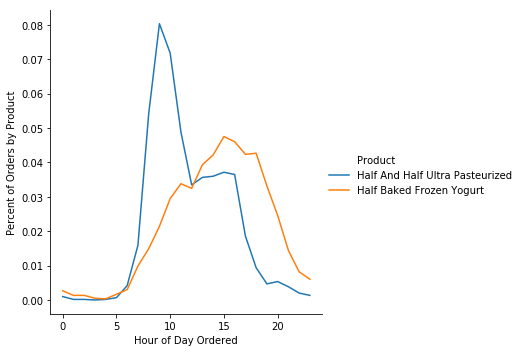

In [93]:
sns.relplot(
    x='Hour of Day Ordered',
    y='Percent of Orders by Product',
    hue='Product',
    data=melted,
    kind='line'
)

## Exercises

In [185]:
flights = sns.load_dataset('flights')

In [186]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [192]:
pivoted = flights.pivot(
    index='month',
    columns='year',
    values='passengers'
)

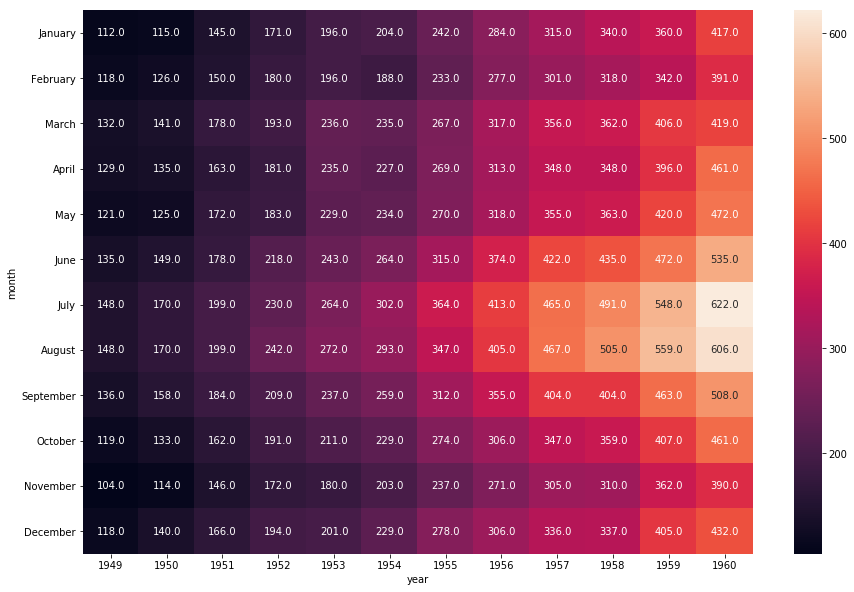

In [199]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pivoted, ax=ax, annot=True, fmt='.1f')

## Stretch

In [200]:
abc.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [201]:
abc.describe()

,product_id,order_id,order_hour_of_day
count,3.381911e+07,3.381911e+07,3.381911e+07
mean,2.557551e+04,1.710566e+06,1.343123e+01
std,1.409770e+04,9.874008e+05,4.246149e+00
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.351900e+04,8.554130e+05,1.000000e+01
50%,2.525600e+04,1.710660e+06,1.300000e+01
75%,3.793500e+04,2.565587e+06,1.600000e+01
max,4.968800e+04,3.421083e+06,2.300000e+01


In [210]:
csvs = !ls
csvs = iter(csvs)

aisles = pd.read_csv(next(csvs))
departments = pd.read_csv(next(csvs))
order_products__prior = pd.read_csv(next(csvs))
order_products__train = pd.read_csv(next(csvs))
orders = pd.read_csv(next(csvs))
products = pd.read_csv(next(csvs))

In [283]:
dfs = [aisles, departments, order_products__prior, order_products__train, orders, products]

def flatten_once(xss):
    return [x for xs in xss for x in xs]
    
def flatten(xss, n=1):
    while n != 0:
        n -= 1
        xss = flatten_once(xss)
    return xss
    
def flip(kv):
    columns = set(flatten(list(kv.values())))
    return {column: [key for key in kv.keys() if column in kv[key]] for column in columns}

def resolve_merge_path(*dfs):
    columns = [list(df.columns) for df in dfs]
    index = {df_id: columns for df_id, columns in zip(it.count(0,1), columns)}
    df_id_by_column = flip(index)
    return df_id_by_column
    
#    for column, df_id in df_id_by_column.items():
#       if 

resolve_merge_path(*dfs)

# => {'aisle_id': ('aisles', 'products'), 'order_id': ('products', 'orders')}

{'add_to_cart_order': [2, 3],
 'product_name': [5],
 'order_dow': [4],
 'department_id': [1, 5],
 'department': [1],
 'days_since_prior_order': [4],
 'aisle': [0],
 'user_id': [4],
 'eval_set': [4],
 'order_hour_of_day': [4],
 'aisle_id': [0, 5],
 'product_id': [2, 3, 5],
 'order_number': [4],
 'reordered': [2, 3],
 'order_id': [2, 3, 4]}